# Fluxonium readout

In [1]:
import numpy as np
import scipy as sc
import scipy.special as sp
import scipy.constants as pyc

from bfqcircuits.core import resonator_fluxonium as rflx

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

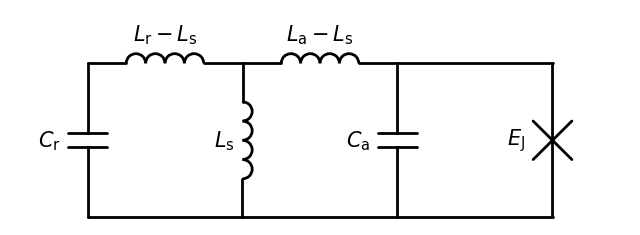

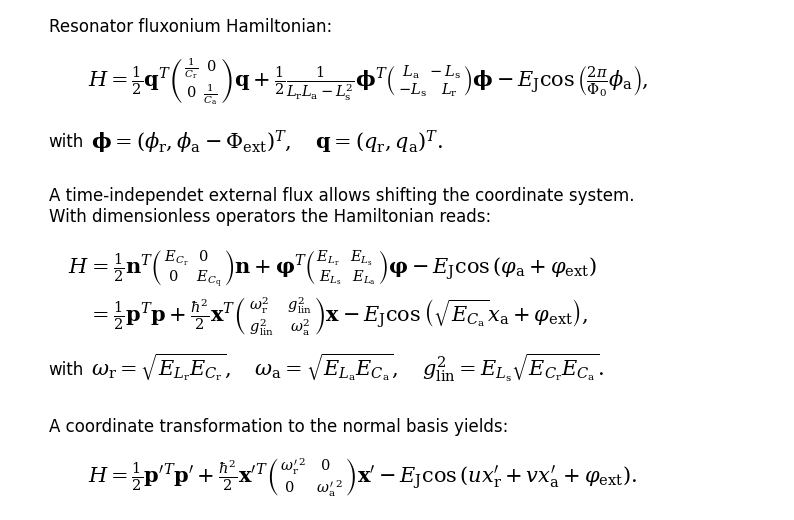

In [2]:
# default product basis, recommended as it is much faster to compute the Hamiltonian matrix
resflux = rflx.ResonatorFluxonium(coupling="inductive", basis="product")
fig = resflux.draw_circuit()
fig = resflux.show_formulas()

In [3]:
Lr = 25.0e-9
Cr = 20.0e-15

La = 300e-9
Ca = 5.0e-15
Ej = 9.0

Ls = 2.0e-9

p_ext = 0.5 * 2 * np.pi

Na = 25
Nr = 10

resflux.set_parameters(Lr=Lr, La=La, Ls=Ls, Cr=Cr, Ca=Ca, Ej=Ej, p_ext=p_ext, Na=Na, Nr=Nr)

# whenever inductuctances and capcitances are changed the Hamiltonian parameters have to be recalculated
resflux.calc_hamiltonian_parameters()

print(resflux.__repr__())

Lr = 2.5000e-08
La = 3.0000e-07
Ls = 2.0000e-09
Cr = 2.0000e-14
Ca = 5.0000e-15

Elr = 6.5419e+00
Ela = 5.4516e-01
Els = -4.3613e-02
Ecr = 7.7481e+00
Eca = 3.0992e+01
Ej = 9.0000e+00
Ejs = 0.0000e+00
Ejd = 0.0000e+00
ratio = 0.0000e+00

wr = 7.1195e+00
wrp = 7.1205e+00
wa = 4.1105e+00
wap = 4.1088e+00
g_lin_sq = -6.7584e-01

S = [[9.9980e-01, 1.9988e-02], [-1.9988e-02, 9.9980e-01]]
flux_zpf = [[1.1740e-01, 0.0000e+00], [0.0000e+00, 3.0902e-01]]
charge_zpf = [[6.7782e-01, 0.0000e+00], [0.0000e+00, 2.5752e-01]]

g = -6.2465e-02



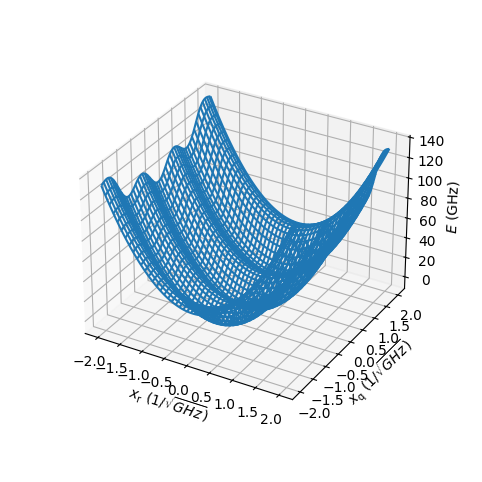

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

resflux.plot_potential(ax, xy_range=(2.0, 2,0), unit_mass=True)

ax.set_box_aspect(aspect=None, zoom=0.8)

plt.show()

In [5]:
resflux.diagonalize_hamiltonian()
resflux.E[:5]

array([ 4.04232896,  5.02134078, 11.16209431, 12.13966377, 15.19953167])

## Parameter sweeps
- the program is designed for 1D sweeps of the circuit parameters
- for the fluxonium certainly most important is the external flux sweep

### Flux sweep

In [6]:
resflux.sweep_external_flux(np.linspace(-0.1, 1.1, 121) * np.pi)
resflux.substract_groundstate_energy_sweep()

Resonator frequency: 7.119765349450261
Maximum plotted energy: 74.91176071560221


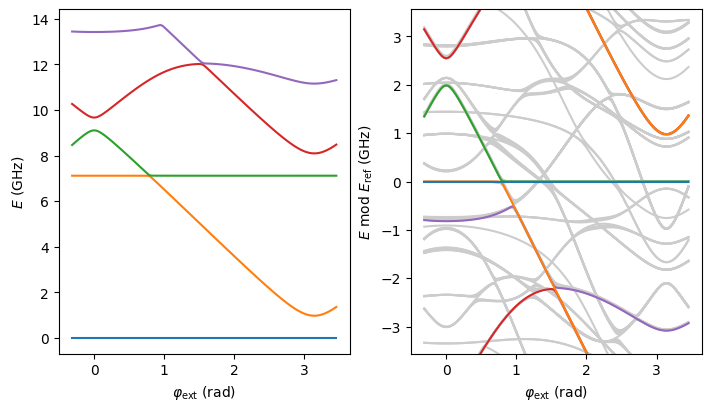

In [7]:
fig = plt.figure(figsize=(7, 4), constrained_layout=True)

ax = fig.add_subplot(121)
resflux.plot_energy_sweep(ax, np.arange(5))
ax.set_xlabel(r"$\varphi_\text{ext}$ (rad)")

ax = fig.add_subplot(122)

# resonator frequency at half flux
fr = resflux.E_sweep[2, 110] - resflux.E_sweep[0, 110]
print("Resonator frequency:", fr)

E_max = resflux.plot_energy_sweep_wrapped(ax, 5, 100, fr)
print("Maximum plotted energy:", E_max)

ax.set_xlabel(r"$\varphi_\text{ext}$ (rad)")

plt.show()

### Sorting energies

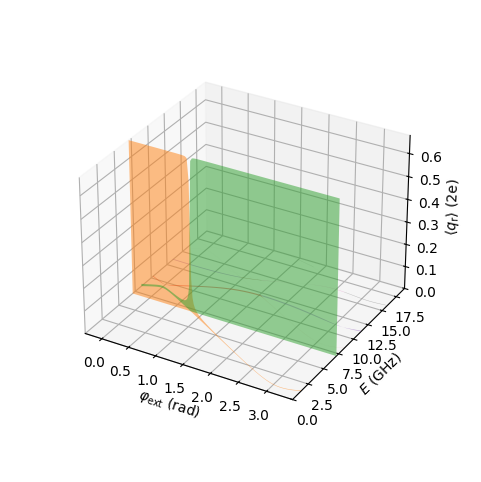

In [8]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(projection="3d")

# this shows how the resonator states are identified
resflux.plot_res_dipole_to_various_states_sweep(ax, 0, np.arange(8), dipole="charge")

ax.set_box_aspect(aspect=None, zoom=0.8)

ax.set_xlabel(r"$\varphi_\text{ext}$ (rad)")

plt.show()

In [9]:
# The parameter dE is the allowed frequency variation of the resonator photons when climbing up the excitation ladder.
# A large value for dE slows down the sorting as more resonator charge dipole moments to all the states within dE have to be calculated.
# If no next state is found within dE, E_trust is set to the current state energy

dE = 0.4

resflux.associate_levels_sweep(dE)
print("Successfully sorted up to {:.2f} GHz".format(resflux.E_trust))

Successfully sorted up to 151.59 GHz


Resonator frequency: 7.119765349450261
Maximum fluxonium state plotted: 17
Maximum resonator state plotted: 8
Maximum eigenstate plotted: 99
Maximum plotted energy: 74.89880118053571


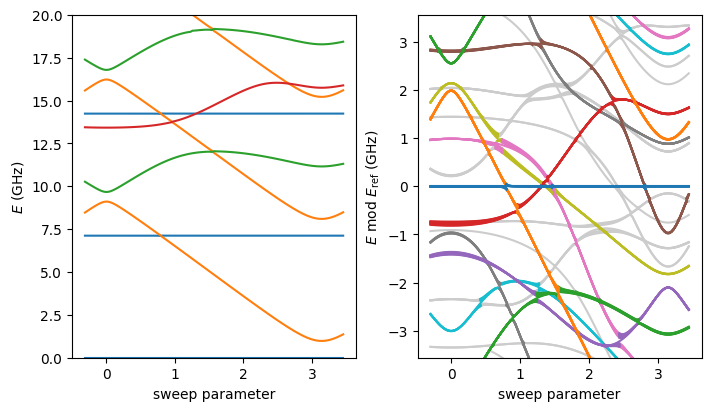

In [10]:
fig = plt.figure(figsize=(7, 4), constrained_layout=True)
ax = fig.add_subplot(121)

resflux.plot_sorted_energy_sweep(ax, np.arange(4), np.arange(5))
ax.set_ylim(0, 20)

fr = resflux.E_sweep[2, 110] - resflux.E_sweep[0, 110]
print("Resonator frequency:", fr)

ax = fig.add_subplot(122)
nq_max, nr_max, n_max, E_max = resflux.plot_sorted_energy_sweep_wrapped(ax, fr, na_max=20, nr_max=8, n=100, gap=False)
print("Maximum fluxonium state plotted:", nq_max)
print("Maximum resonator state plotted:",nr_max)
print("Maximum eigenstate plotted:", n_max)
print("Maximum plotted energy:", E_max)

plt.show()

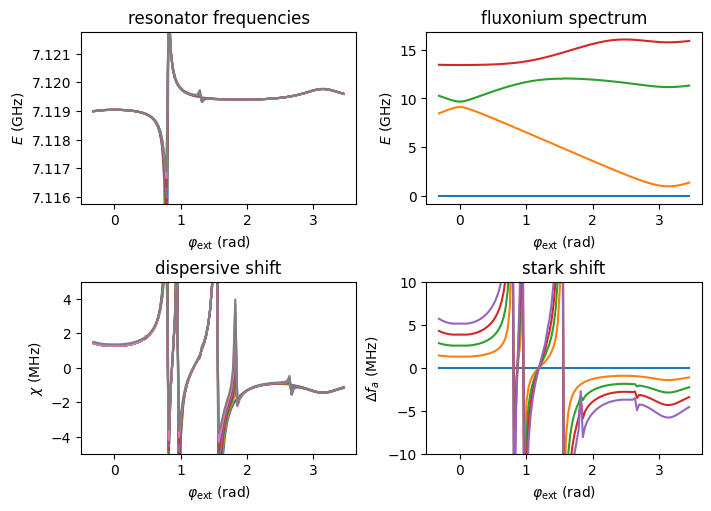

In [11]:
fig = plt.figure(figsize=(7, 5), constrained_layout=True)
ax = fig.add_subplot(221)

resflux.derive_spectrum_properties_sweep()

ax.set_title("resonator frequencies")
resflux.plot_resonator_transitions_sweep(ax, np.arange(1), np.arange(8)) # resonator frequency with fluxonium in ground state
ax.set_ylim(fr - 4e-3, fr + 2e-3)
ax.set_xlabel(r"$\varphi_\mathrm{ext}$ (rad)")
ax.set_ylabel(r"$E$ (GHz)")

ax = fig.add_subplot(222)
ax.set_title("fluxonium spectrum")
resflux.plot_spectrum_sweep(ax, np.arange(4), np.arange(1))  # spectrum of the fluxonium with the resonator in the ground state
ax.set_xlabel(r"$\varphi_\mathrm{ext}$ (rad)")
ax.set_ylabel(r"$E$ (GHz)")

ax = fig.add_subplot(223)
ax.set_title("dispersive shift")
resflux.plot_chi_sweep(ax, [1], np.arange(8))  # dispersive resonator frequency shift of the qubit
ax.set_ylim(-5, 5)
ax.set_xlabel(r"$\varphi_\mathrm{ext}$ (rad)")
ax.set_ylabel(r"$\chi$ (MHz)")

ax = fig.add_subplot(224)
ax.set_title("stark shift")
resflux.plot_stark_shift_sweep(ax, [1], np.arange(5)) # qubit frequency shift with increasing number of photons in the resonator
ax.set_ylim(-10, 10)
ax.set_xlabel(r"$\varphi_\mathrm{ext}$ (rad)") 
ax.set_ylabel(r"$\Delta f_a$ (MHz)")

plt.show()

### Josephson energy sweep

In this second sweep example the Josephson energy is varied with the fluxonium biased at half flux.
The goal is to optimize the level structure at large photon numbers in the resonator. A similar strategy is to tune the readout frequency, e.g. by sweeping the resonator inductance.

In [12]:
resflux.set_parameters(p_ext=np.pi)
resflux.sweep_parameter(np.linspace(5, 12, 71), "Ej")
resflux.substract_groundstate_energy_sweep()

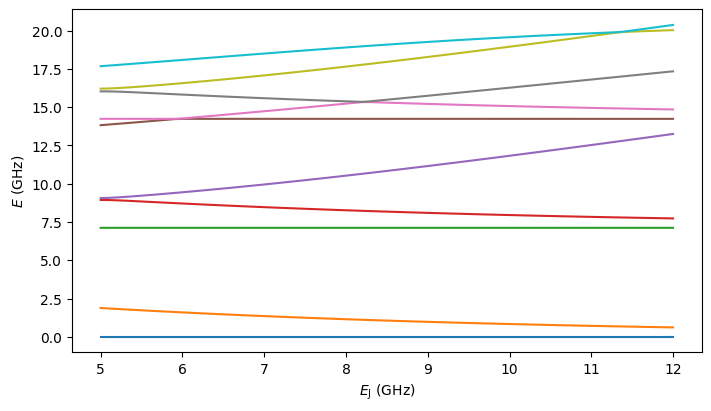

In [13]:
fig = plt.figure(figsize=(7, 4), constrained_layout=True)

ax = fig.add_subplot(111)
resflux.plot_energy_sweep(ax, np.arange(10))

ax.set_xlabel(r"$E_\text{J}$ (GHz)")

plt.show()

In [14]:
resflux.associate_levels_sweep(dE)
print("Successfully sorted up to {:.2f} GHz".format(resflux.E_trust))

Successfully sorted up to 155.96 GHz


Maximum fluxonium state plotted: 20
Maximum resonator state plotted: 8
Maximum eigenstate plotted: 235
Maximum plotted energy: 141.89084457589925


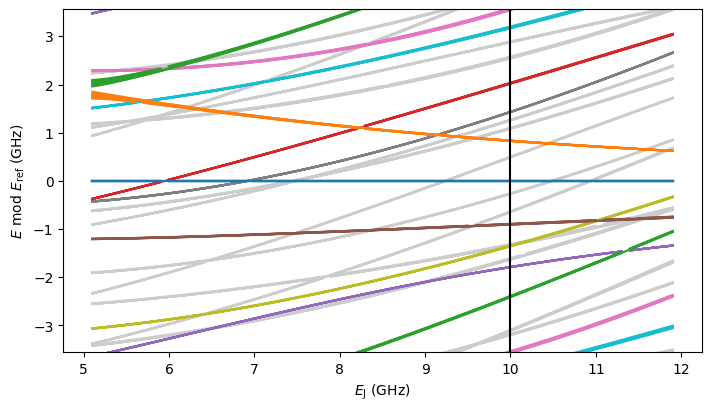

In [15]:
fig = plt.figure(figsize=(7, 4), constrained_layout=True)
ax = fig.add_subplot(111)

fr = resflux.E_sweep[2, :] - resflux.E_sweep[0, :]
nq_max, nr_max, n_max, E_max = resflux.plot_sorted_energy_sweep_wrapped(ax, fr, na_max=20, nr_max=8)
print("Maximum fluxonium state plotted:", nq_max)
print("Maximum resonator state plotted:",nr_max)
print("Maximum eigenstate plotted:", n_max)
print("Maximum plotted energy:", E_max)

ax.axvline(10.0, color="k")  # good spot, other levels are far away from qubit levels (blue, orange)

ax.set_xlabel(r"$E_\text{J}$ (GHz)")

plt.show()

## High power readout behaviour

In [16]:
resflux.set_parameters(Ej=10.0, Na=40, Nr=200)  # this runs for 5min
resflux.diagonalize_hamiltonian()

In [17]:
dE = 0.1
resflux.associate_levels(dE, na_max=10)
print(resflux.E_trust)

resflux.derive_spectrum_properties()

1413.2902451627822


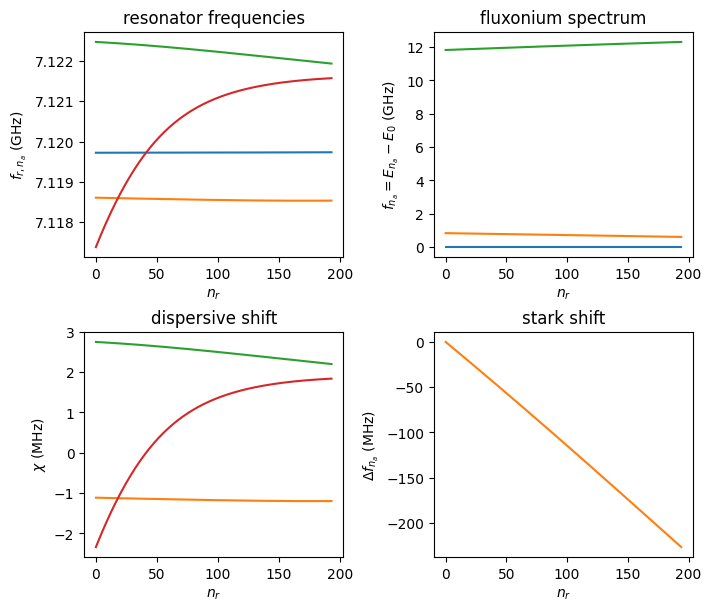

In [18]:
fig = plt.figure(figsize=(7, 6), constrained_layout=True) 

# the last few resonator states are usually not converged
dnr = 5

ax = fig.add_subplot(221)
ax.set_title("resonator frequencies")
ax.plot(resflux.resonator_transitions[0, :-dnr])  # resonator frequency with fluxonium in ground state
ax.plot(resflux.resonator_transitions[1, :-dnr])  # resonator frequency with fluxonium in first excited state
ax.plot(resflux.resonator_transitions[2, :-dnr])  # resonator frequency with fluxonium in second excited state
ax.plot(resflux.resonator_transitions[3, :-dnr])  # resonator frequency with fluxonium in second excited state
ax.set_xlabel("$n_r$")
ax.set_ylabel("$f_{r, n_a}$ (GHz)")

ax = fig.add_subplot(222)
ax.set_title("fluxonium spectrum")
ax.plot(resflux.atom_spectrum[0, :-dnr], color="C0")  # ground state
ax.plot(resflux.atom_spectrum[1, :-dnr], color="C1")  # first excited state
ax.plot(resflux.atom_spectrum[2, :-dnr], color="C2")  # second excited state
ax.set_xlabel("$n_r$")
ax.set_ylabel("$f_{n_a} = E_{n_a} - E_0$ (GHz)")

ax = fig.add_subplot(223)
ax.set_title("dispersive shift")
ax.plot(1e3 * resflux.chi[1, :-dnr], color="C1")   # first excited state
ax.plot(1e3 * resflux.chi[2, :-dnr], color="C2")   # second excited state
ax.plot(1e3 * resflux.chi[3, :-dnr], color="C3")   # second excited state
ax.set_xlabel("$n_r$")
ax.set_ylabel(r"$\chi$ (MHz)")

ax = fig.add_subplot(224)
ax.set_title("stark shift")
ax.plot(1e3 * resflux.atom_stark_shift[1, :-dnr], color="C1") 
ax.set_xlabel("$n_r$")
ax.set_ylabel(r"$\Delta f_{n_a}$ (MHz)")

plt.show()

## Capacitive coupling

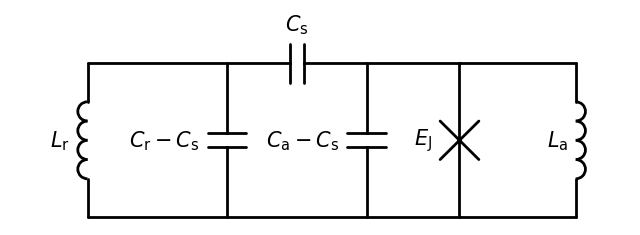

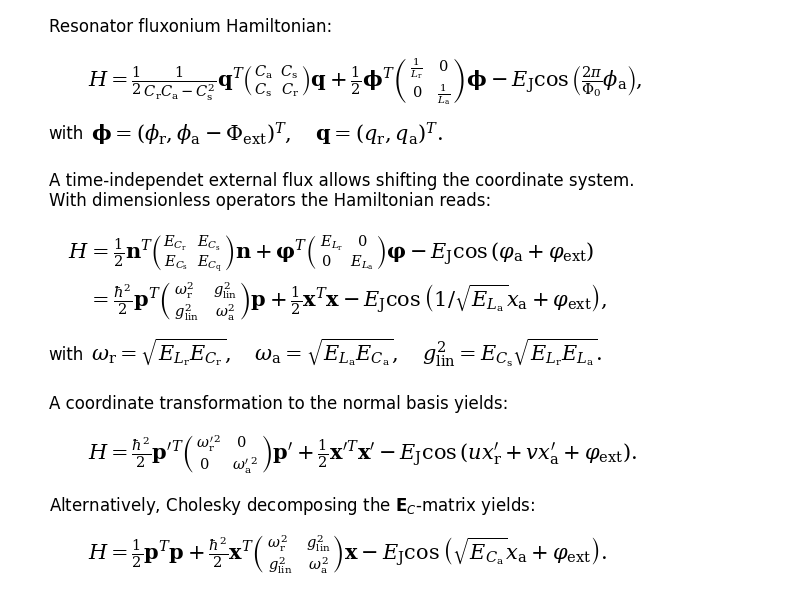

In [19]:
# the usage is analogue as demonstrated above for the inductive coupling
# default product basis, recommended as it is much faster to compute the Hamiltonian matrix

resflux = rflx.ResonatorFluxonium(coupling="capacitive", basis="product")
fig = resflux.draw_circuit()
fig = resflux.show_formulas()

In [20]:
Lr = 25.0e-9
Cr = 20.0e-15

Lq = 300e-9
Cq = 5.0e-15
Ej = 9.0

Cs = 0.15e-15

Na = 25
Nr = 10

p_ext = 0.5 * 2 * np.pi

resflux.set_parameters(Lr=Lr, La=La, Cr=Cr, Ca=Ca, Cs=Cs, Ej=Ej, p_ext=p_ext, Na=Na, Nr=Nr)

# whenever inductuctances and capcitances are changed the Hamiltonian parameters have to be calculated again
resflux.calc_hamiltonian_parameters()

print(resflux.__repr__())

Lr = 2.5000e-08
La = 3.0000e-07
Cr = 2.0000e-14
Ca = 5.0000e-15
Cs = 1.5000e-16

Elr = 6.5385e+00
Ela = 5.4487e-01
Ecr = 7.7498e+00
Eca = 3.0999e+01
Ecs = 2.3250e-01
Ej = 9.0000e+00
Ejs = 0.0000e+00
Ejd = 0.0000e+00
ratio = 0.0000e+00

wr = 7.1184e+00
wrp = 7.1188e+00
wa = 4.1098e+00
wap = 4.1091e+00
g_lin_sq = 4.3883e-01

S = [[9.9992e-01, -1.2987e-02], [1.2987e-02, 9.9992e-01]]
flux_zpf = [[1.1742e-01, 0.0000e+00], [0.0000e+00, 3.0908e-01]]
charge_zpf = [[6.7769e-01, 0.0000e+00], [0.0000e+00, 2.5747e-01]]

g = 4.0566e-02



In [21]:
# With the cholesky decomposition of the Ec matrix the Hamiltonian can be transformed to correspond to a particle with uniform and unit mass.  
# This means that the coupling appears in the flux potential. In this way, inductive and capacitive coupling can be comprared.

wr_sq, wa_sq, g_lin_sq = resflux.cholesky_transformation()
print(np.sqrt(wr_sq), np.sqrt(wa_sq), g_lin_sq, np.sqrt(resflux.Eca))

7.117625434171772 4.11121217383578 0.7601653994728557 5.567705251838782


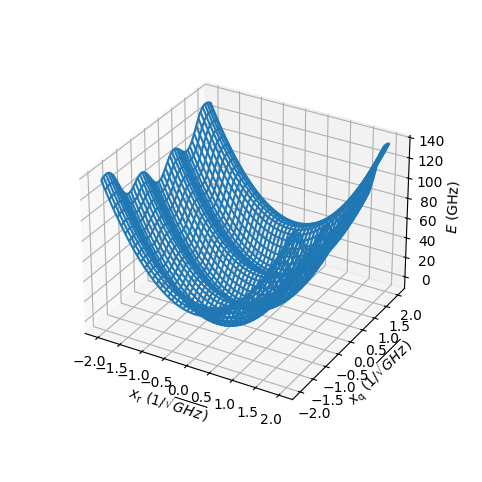

In [22]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

resflux.plot_potential(ax, xy_range=(2.0, 2,0), unit_mass=True)

ax.set_box_aspect(aspect=None, zoom=0.8)

plt.show()

In [23]:
resflux.sweep_external_flux(np.linspace(-0.1, 1.1, 121) * np.pi)
resflux.substract_groundstate_energy_sweep()

In [24]:
resflux.associate_levels_sweep(0.2)
print("Successfully sorted up to {:.2f} GHz".format(resflux.E_trust))

Successfully sorted up to 108.47 GHz


Resonator frequency: 7.11793066349121
Maximum fluxonium state plotted: 17
Maximum resonator state plotted: 8
Maximum eigenstate plotted: 99
Maximum plotted energy: 74.90405623508298


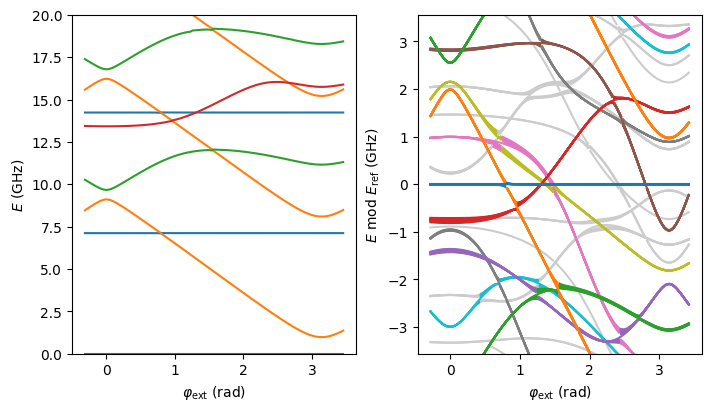

In [25]:
fig = plt.figure(figsize=(7, 4), constrained_layout=True)
ax = fig.add_subplot(121)

resflux.plot_sorted_energy_sweep(ax, np.arange(4), np.arange(5))
ax.set_ylim(0, 20)
ax.set_xlabel(r"$\varphi_\mathrm{ext}$ (rad)")

fr = resflux.E_sweep[2, 110] - resflux.E_sweep[0, 110]
print("Resonator frequency:", fr)

ax = fig.add_subplot(122)
nq_max, nr_max, n_max, E_max = resflux.plot_sorted_energy_sweep_wrapped(ax, fr, na_max=20, nr_max=8, n=100)
print("Maximum fluxonium state plotted:", nq_max)
print("Maximum resonator state plotted:",nr_max)
print("Maximum eigenstate plotted:", n_max)
print("Maximum plotted energy:", E_max)

ax.set_xlabel(r"$\varphi_\mathrm{ext}$ (rad)")

plt.show()

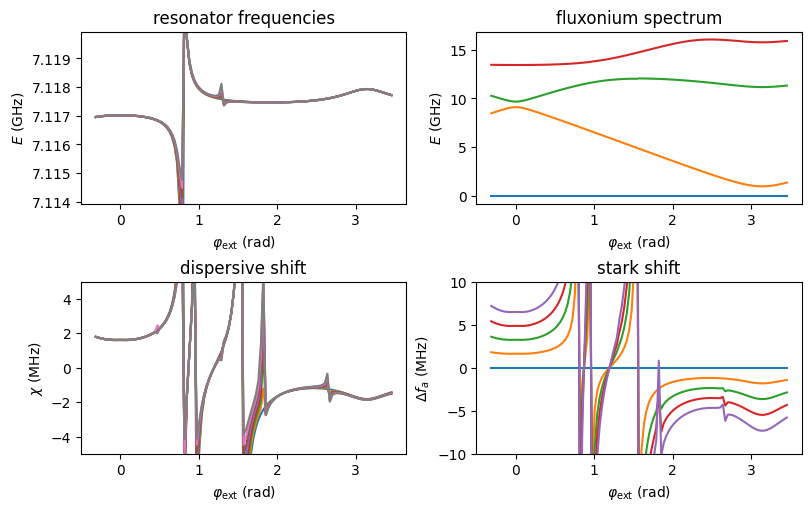

In [26]:
fig = plt.figure(figsize=(8, 5), constrained_layout=True)
ax = fig.add_subplot(221)

resflux.derive_spectrum_properties_sweep()

ax.set_title("resonator frequencies")
resflux.plot_resonator_transitions_sweep(ax, np.arange(1), np.arange(8)) # resonator frequency with fluxonium in ground state
ax.set_ylim(fr - 4e-3, fr + 2e-3)
ax.set_xlabel(r"$\varphi_\mathrm{ext}$ (rad)")
ax.set_ylabel(r"$E$ (GHz)")

ax = fig.add_subplot(222)
ax.set_title("fluxonium spectrum")
resflux.plot_spectrum_sweep(ax, np.arange(4), np.arange(1))  # spectrum of the fluxonium with the resonator in the ground state
ax.set_xlabel(r"$\varphi_\mathrm{ext}$ (rad)")
ax.set_ylabel(r"$E$ (GHz)")

ax = fig.add_subplot(223)
ax.set_title("dispersive shift")
resflux.plot_chi_sweep(ax, [1], np.arange(8))  # dispersive resonator frequency shift of the qubit
ax.set_ylim(-5, 5)
ax.set_xlabel(r"$\varphi_\mathrm{ext}$ (rad)")
ax.set_ylabel(r"$\chi$ (MHz)")

ax = fig.add_subplot(224)
ax.set_title("stark shift")
resflux.plot_stark_shift_sweep(ax, [1], np.arange(5)) # qubit frequency shift with increasing number of photons in the resonator
ax.set_ylim(-10, 10)
ax.set_xlabel(r"$\varphi_\mathrm{ext}$ (rad)") 
ax.set_ylabel(r"$\Delta f_a$ (MHz)")

plt.show()

## More...
- calculate dipole moments, ... 
- get creative with the code and adapt it to your needs